In [2]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import binomial as binomial

1 (1 point). Use the binomial function to simulate a binary spike train with 10000 time bins. Each time bin is 1 ms long, and the spike probability in each bin is .05. (There is only one trial.) Compute the average firing rate from that simulation and print it.

In [134]:
sim = binomial(n=1,p=0.05,size=(10000,))
firing_rate_ms = sum(sim)/10000 # ms 
firing_rate = sum(sim) / 10000 * 1000
print("The average firing rate is", firing_rate, "Hz.")  

The average firing rate is 48.099999999999994 Hz.


2 (1 point). Use the binomial function to simulate a spike train with 10000 time bins. Each time bin is 2 ms long, and the average firing rate from the simulation should be approximately 100 spikes/second. Compute and print the total spike count.

In [135]:
total_time_ms = 10000 * 2 # ms
total_time = total_time_ms / 1000 # s
total_spikes = 100 * total_time
print("The total spike count should be", total_spikes, "when the spike probablity is around 0.2.")
sim = binomial(n=1, p=0.2, size=(10000,))
print(sum(sim))

The total spike count should be 2000.0 when the spike probablity is around 0.2.
1999


3 (1 point). Consider a coin flip neuron simulated for one trial of length $T$ ms, divided into time bins of size $dt$. In each time bin, the neuron has a fixed probability of spiking, $p$. What is the expected firing rate of the neuron? Explain your answer.

In [4]:
# give a function 

# firing_rate = p * (T/dt) / (T/1000)
# firing_rate = p * T / dt / T * 1000

# this is the expected firing rate, as deducted by above formulas
firing_rate = p * 1000 * dt 

4 (1 point). Using the binomial function, create a variable called spike_array that simulates the results of an experiment recording from a neuron over 20 trials. Each trial is 10 seconds long. The average firing rate in each trial should be around 20 Hz. The first dimension of your array should correspond to time bins, and the second to trials (so it should have 20 columns). 

   Remember: the "size" argument of the binomial function can be assiged a tuple, one number for each of multiple dimensions of the output.

   Compute and print the average firing rate for each trial in your simulated experiment.

In [136]:
# Since the average firing rate in each trial is around 20 Hz, in other words, 20 spikes per sec, we should look for
# approximately 200 spikes per trial, which happens when spike probsbility = 0.02.

spike_array = binomial(n=1, p=0.02, size=(10000,20)) # 10 seconds = 10000 ms 
print(sum(spike_array))
average_firing_rate = sum(spike_array) / 10
print("The averaging firing rate for each trial is", average_firing_rate)

[177 183 185 198 200 191 211 201 224 197 200 174 216 197 203 195 177 196
 192 185]
The averaging firing rate for each trial is [17.7 18.3 18.5 19.8 20.  19.1 21.1 20.1 22.4 19.7 20.  17.4 21.6 19.7
 20.3 19.5 17.7 19.6 19.2 18.5]


5 (3 points). Simulate a Halle Berry neuron from the Quian & Quiroga paper. 

Each trial is three seconds long: one second before the image is presented to the patient, one second of image presentation, and one second after.

At the beginning of each trial, one of 88 images is randomly chosen for that trial's image presentation. The recorded neuron is responsive to 5 images of those 88 images (the pictures of Halle Berry).

If the neuron is responsive to an image, its firing rate during the presentation should be 40 Hz. The neuron has a baseline firing rate of 2 Hz. Other parameters can be found in the starter code below.

After simulating the neuron, compute and plot its trial-averaged PSTH in units of Hz. Label your axes.

In [137]:
# this is used for testing the spike probabilty 
sim = binomial(n=1, p=2/1000, size=(1000,))
print(sum(sim))

sim = binomial(n=1, p=40/1000, size=(1000,))
print(sum(sim))

3
50


In [139]:
image_labels = range(88)

responsive_images = np.random.choice(image_labels, size=(5,)) # randomly choose five image labels for the Halle Berry pictures

num_trials = 1000
trial_length = 3000 # 1000 ms before stim onset, 1000 ms with stim on, and 1000 ms after stim offset
dt = 1 # time step, ms

# calculate the spike probability, per bin of size dt, corresponding to the baseline rate of 2 Hz
baseline_spike_prob = 2/1000

# calculate the spike probability, per bin of size dt, corresponding to the response to a picture of Halle Berry
responsive_spike_prob = 40/1000 

spike_array = np.zeros(shape=(trial_length, num_trials)) # placehold for the final spike array 

for n in range(num_trials): # simulate the trials one by one; n is the current trial
    
    this_trial_im = np.random.choice(image_labels) # pick an image to show on this trial
    
    this_trial_spike_train = np.zeros((trial_length,)) # placehold for this trial's spike train
    ### simulate this trial's spike train! 
    if this_trial_im in responsive_images:
        this_trial_spike_train[0:1000] = binomial(n=1, p=baseline_spike_prob, size=(1000,))
        this_trial_spike_train[1000:2000] = binomial(n=1, p=responsive_spike_prob, size=(1000,))
        this_trial_spike_train[2000:3000] = binomial(n=1, p=baseline_spike_prob, size=(1000,))
    else:
        this_trial_spike_train = binomial(n=1, p=baseline_spike_prob, size=(3000,))
    
    spike_array[:,n] = this_trial_spike_train # which elements of spike_array should this trial's spike train go into?
    

Text(0.5, 1.0, 'PSTH Plot')

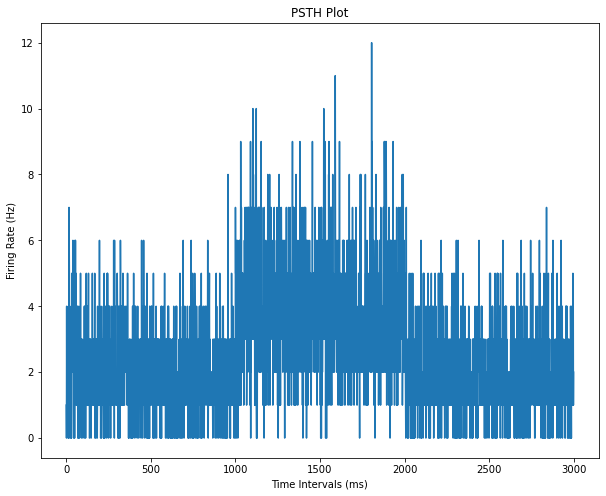

In [140]:
# spike_counts calculates the total number of spikes on each time interval
spike_counts = np.sum(spike_array,axis=1)
psth = spike_counts * 1000 / num_trials # spikes / s (average over trials)
plt.figure(figsize=(10,8))
plt.plot(np.arange(0,3000,1), psth)
plt.xlabel("Time Intervals (ms)")
plt.ylabel("Firing Rate (Hz)")
plt.title("PSTH Plot")

6 (3 points). Simulate a network of two "coin flip" neurons, using time bins of 1 ms. 

Each neuron has a baseline spike rate of 20 Hz. 

Neuron one makes an excitatory synapse onto neuron two. Here, we model this by saying that after each spike in neuron one, the spike rate of neuron two increases by 10 Hz for a period of 10 ms. (If neuron one spikes again within that 10 ms window, the spike rate of neuron two increases by another 10 Hz for 10ms from that spike time - and so on.)

Simulate the activity of this network for 1 trial of 2 minutes, using 1ms bins. Use the function compute_correlogram below to plot the cross_correlation of the two-neurons' spike trains and discuss the plot.

Remember: the binomial function can take a vector of spike probabilities as an input - it will then produce one output for each input spike probability. 

In [130]:
### this function is complete, just execute the cell to define it and move to the next code cell

def compute_correlogram(spk1, spk2, lags=np.arange(-100, 100, 1.)):
    
    '''
    the binary spike array should have dimensions of time, neurons
    returns: time lags (in the same units as the time bins of the input spike_array)
    and the cross-correlation function of the first two columns in the spike array
    
    That cross-correlation is the 
    '''

    if len(np.shape(spk1)) != 1:
        spk1 = np.squeeze(spk1)
        
    if len(np.shape(spk2)) != 2:
        spk2 = np.squeeze(spk2)
        
    if len(spk1) != len(spk2):
        raise Exception('Need the two spike trains to be the same length!')
    
    Nlags = lags.size
    Nt = spk1.shape[0]
    xcorr = np.zeros(Nlags,)

    for i in range(0,Nlags):
        nshift = int(lags[i]) # number of bins, and direction, to shift by
        
        if nshift >= 0:
            xcorr[i] += np.dot(spk2[nshift:Nt:1],spk1[0:Nt-nshift:1]) # the dot product is the sum of the products of two vectors' elements
        else:
            nshift = -nshift
            xcorr[i] += np.dot(spk2[0:Nt-nshift:1],spk1[nshift:Nt:1])
            
        xcorr[i] = xcorr[i]/(Nt-np.abs(lags[i])) # this normalization is for a statistically unbiased estimate
        
    return lags, xcorr

Text(0.5, 1.0, 'Cross Correlation Plot')

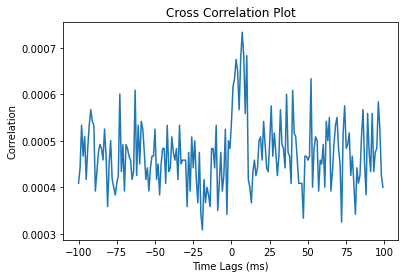

In [147]:
### fill in the missing values, and fill in the for loop

tstop = 2 * 60 * 1000 # two minutes in ms 
dt = 1 # ms
num_time_steps = tstop * dt

# firing_rate = p * 1000 * dt
baseline_spike_prob = 20 / 1000 # use your result from question 3

neuron_one_spike_train = binomial(n=1, p=baseline_spike_prob, size=(num_time_steps,))

neuron_two_spike_probability = np.zeros((num_time_steps,)) + baseline_spike_prob # placeholder - zeros should be replaced

for t in range(num_time_steps):
    if neuron_one_spike_train[t] == 1:
        # neuron 2 increases by 10 Hz if neuron1 makes excitatory synapse
        neuron_two_spike_probability[t:t+11] = (20 + 10)/1000 
        
neuron_two_spike_train = np.random.binomial(n=1, p=neuron_two_spike_probability, size=len(neuron_two_spike_probability))
output1, output2 = compute_correlogram(neuron_one_spike_train, neuron_two_spike_train, lags=np.arange(-100, 100, 1.))

plt.figure()
plt.plot(output1, output2)
plt.xlabel("Time Lags (ms)")
plt.ylabel("Correlation")
plt.title("Cross Correlation Plot")


Discussion: The correlation is the highest when both the neurons fire at the same time. The more different the firing times are, the lower the correlation is (the strength of synapses decreases.)